In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('ggplot') 

In [2]:
# import team statistics and salary statistics

teams = pd.read_csv('C:/Users/528264/Desktop/DS5k/Final Project/baseball-databank/Teams.csv', index_col=0)
#batting = pd.read_csv('C:/Users/528264/Desktop/DS5k/Final Project/baseball-databank/Batting.csv', index_col=0)
#pitching = pd.read_csv('C:/Users/528264/Desktop/DS5k/Final Project/baseball-databank/Pitching.csv', index_col=0)
salaries = pd.read_csv('C:/Users/528264/Desktop/DS5k/Final Project/baseball-databank/Salaries.csv', index_col=0)

In [3]:
# Remove all entries for teams before 1985 when salary data started being tracked.
teams = teams[teams.yearID > 1984]
teams.shape

(888, 47)

In [4]:
# Create a column to make unique identifier based on the year and the team name
teams["TeamYear"] = teams["teamID"] + teams["yearID"].map(str)
salaries["TeamYear"] = salaries["teamID"] + salaries["yearID"].map(str)

In [5]:
# Sum the player salaries for each team/year
teamsalaries = salaries.groupby('TeamYear').salary.sum()
teamsalaries.head()

TeamYear
ANA1997    31135472
ANA1998    41281000
ANA1999    55388166
ANA2000    51464167
ANA2001    47535167
Name: salary, dtype: int64

In [6]:
# Create new table with teamsalaries

teamsalaries = teamsalaries.rename().to_frame()
teamsalaries.columns = ['Salary']
teamsalaries = teamsalaries.reset_index(drop=False)


In [7]:
teamsalaries.head()

,TeamYear,Salary
0,ANA1997,31135472
1,ANA1998,41281000
2,ANA1999,55388166
3,ANA2000,51464167
4,ANA2001,47535167


In [8]:
# Merge team salary and team stat data
team_stats = pd.merge(teams, teamsalaries)


In [9]:
team_stats.shape

(888, 49)

In [10]:
team_stats[['HBP', 'SF']] = team_stats[['HBP', 'SF']].fillna(value=0)
team_stats.HBP.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HBP, dtype: float64

In [11]:
team_stats["BA"] = team_stats["H"] / team_stats["AB"]
team_stats['OBP'] = (team_stats['H'] + team_stats['BB'] + team_stats['HBP']) / (team_stats['AB'] + team_stats['BB'] + team_stats['HBP'] + team_stats['SF'])
team_stats['SLG'] = (team_stats['H'] + team_stats['2B'] + (2*team_stats['3B']) + (3*team_stats['HR'])) / team_stats['AB']
team_stats["OPS"] = team_stats["OBP"] + team_stats["SLG"]
team_stats["WHIP"] = (team_stats["HA"] + team_stats["BBA"]) / (team_stats["IPouts"]/3)
team_stats['SBP'] = team_stats['SB'] / (team_stats['SB'] + team_stats['CS'])

In [12]:
team_stats.head()

,teamID,yearID,lgID,divID,Rank,G,Ghome,W,L,DivWin,...,teamIDlahman45,teamIDretro,TeamYear,Salary,BA,OBP,SLG,OPS,WHIP,SBP
0,ATL,1985,NL,W,5,162,81.0,66,96,N,...,ATL,ATL,ATL1985,14807000,0.245928,0.314525,0.363011,0.677537,1.478380,0.580645
1,BAL,1985,AL,E,4,161,81.0,83,78,N,...,BAL,BAL,BAL1985,11560712,0.263005,0.335729,0.429763,0.765492,1.435179,0.616071
2,BOS,1985,AL,E,5,163,81.0,81,81,N,...,BOS,BOS,BOS1985,10897560,0.282343,0.346546,0.429196,0.775741,1.387406,0.709677
3,CAL,1985,AL,W,2,162,79.0,90,72,N,...,CAL,CAL,CAL1985,14427894,0.250643,0.330378,0.385888,0.716265,1.350034,0.675159
4,CHA,1985,AL,W,3,163,81.0,85,77,N,...,CHA,CHA,CHA1985,9846178,0.253382,0.312574,0.392139,0.704713,1.364576,0.658537


In [13]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 55 columns):
teamID            888 non-null object
yearID            888 non-null int64
lgID              888 non-null object
divID             888 non-null object
Rank              888 non-null int64
G                 888 non-null int64
Ghome             888 non-null float64
W                 888 non-null int64
L                 888 non-null int64
DivWin            860 non-null object
WCWin             624 non-null object
LgWin             860 non-null object
WSWin             860 non-null object
R                 888 non-null int64
AB                888 non-null int64
H                 888 non-null int64
2B                888 non-null int64
3B                888 non-null int64
HR                888 non-null int64
BB                888 non-null int64
SO                888 non-null float64
SB                888 non-null float64
CS                888 non-null float64
HBP               888 non-nul

In [14]:
analysis = team_stats[['TeamYear', 'W', 'HR', 'ERA', 'SO', 'SB','HRA', 'SOA', 'WHIP', 'E', 'OBP', 'SLG', 'OPS', 'Salary', 'attendance']].copy()
list(analysis)    

['TeamYear',
 'W',
 'HR',
 'ERA',
 'SO',
 'SB',
 'HRA',
 'SOA',
 'WHIP',
 'E',
 'OBP',
 'SLG',
 'OPS',
 'Salary',
 'attendance']

In [28]:
analysis.tail()

,TeamYear,W,HR,ERA,SO,SB,HRA,SOA,WHIP,E,OBP,SLG,OPS,Salary,attendance
883,LAN2015,92,187,3.44,1258.0,59.0,145,1396,1.184229,75,0.326101,0.412628,0.738729,215792000,3764815.0
884,SFN2015,84,136,3.72,1159.0,93.0,155,1165,1.228941,78,0.326130,0.406110,0.732239,164701500,3375882.0
885,ARI2015,79,154,4.04,1312.0,132.0,182,1215,1.329545,86,0.323808,0.414410,0.738218,61834000,2080145.0
886,SDN2015,74,148,4.09,1327.0,82.0,171,1393,1.310113,92,0.300084,0.384827,0.684911,118441300,2459742.0
887,COL2015,68,186,5.04,1283.0,97.0,183,1112,1.512970,95,0.315248,0.432340,0.747588,95688600,2506789.0


In [15]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 15 columns):
TeamYear      888 non-null object
W             888 non-null int64
HR            888 non-null int64
ERA           888 non-null float64
SO            888 non-null float64
SB            888 non-null float64
HRA           888 non-null int64
SOA           888 non-null int64
WHIP          888 non-null float64
E             888 non-null int64
OBP           888 non-null float64
SLG           888 non-null float64
OPS           888 non-null float64
Salary        888 non-null int64
attendance    888 non-null float64
dtypes: float64(8), int64(6), object(1)
memory usage: 111.0+ KB


In [16]:
analysis.isnull().sum()

TeamYear      0
W             0
HR            0
ERA           0
SO            0
SB            0
HRA           0
SOA           0
WHIP          0
E             0
OBP           0
SLG           0
OPS           0
Salary        0
attendance    0
dtype: int64

In [17]:
analysis.describe(include='all')

,TeamYear,W,HR,ERA,SO,SB,HRA,SOA,WHIP,E,OBP,SLG,OPS,Salary,attendance
count,888,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,8.880000e+02,8.880000e+02
unique,888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CHN1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,79.911036,157.081081,4.206599,1036.444820,104.930180,157.081081,1036.440315,1.372083,109.422297,0.328507,0.409492,0.737999,5.784797e+07,2.291292e+06
std,NaN,11.881886,36.965357,0.560479,153.897304,36.623248,30.320724,153.879185,0.095039,20.016584,0.014525,0.029108,0.041427,4.147943e+07,7.212411e+05
min,NaN,43.000000,58.000000,2.910000,568.000000,25.000000,76.000000,560.000000,1.144647,54.000000,0.292066,0.326515,0.627195,8.800000e+05,6.427450e+05
25%,NaN,71.750000,129.000000,3.790000,926.000000,78.000000,135.000000,930.750000,1.302332,95.000000,0.319020,0.389673,0.708770,2.437550e+07,1.754821e+06
50%,NaN,80.000000,156.000000,4.170000,1035.500000,101.000000,158.000000,1034.000000,1.367042,108.000000,0.327477,0.407916,0.736323,4.879828e+07,2.237177e+06
75%,NaN,89.000000,181.000000,4.580000,1133.250000,127.000000,177.000000,1143.000000,1.438273,123.000000,0.338110,0.429418,0.766015,8.166700e+07,2.811744e+06


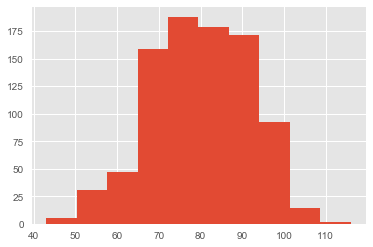

In [18]:
analysis.W.hist()

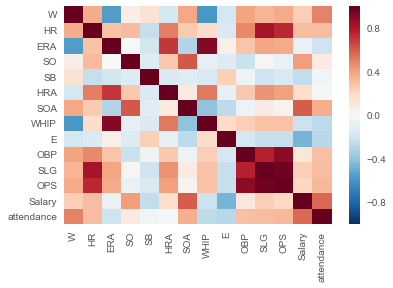

In [19]:
sns.heatmap(analysis.corr());

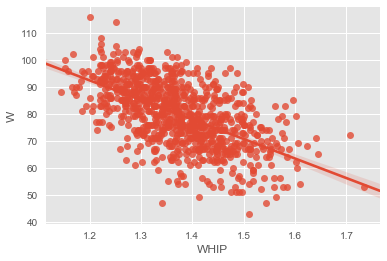

In [20]:
sns.regplot(analysis['WHIP'],analysis['W'])

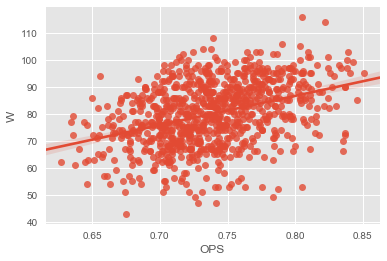

In [21]:
sns.regplot(analysis['OPS'],analysis['W'])

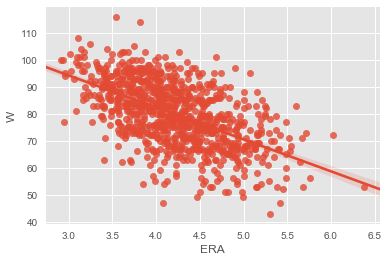

In [22]:
sns.regplot(analysis['ERA'],analysis['W'])

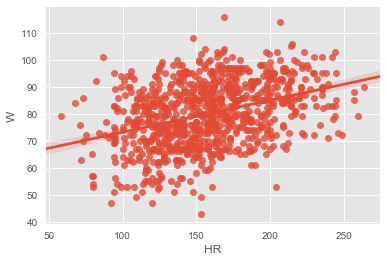

In [23]:
sns.regplot(analysis['HR'],analysis['W'])

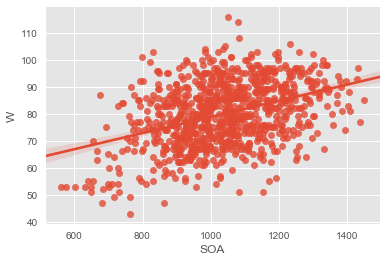

In [24]:
sns.regplot(analysis['SOA'],analysis['W'])

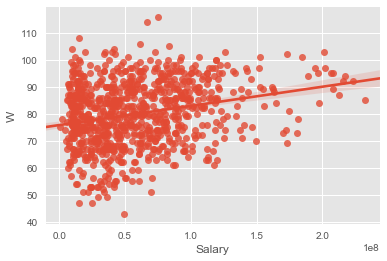

In [25]:
sns.regplot(analysis['Salary'],analysis['W'])

## Linear Regression for Predicting Team Wins

In [26]:
#run linear regression

# create a list of features
feature_cols = ['OPS', 'HR', 'SOA', 'Salary']

# create feature matrix (X)
X = analysis[feature_cols]
# create response vector (y)
y = analysis.W

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#train the model on the training data

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.23829161769261542

In [32]:
#Test the model on theyhat = lr.predict(X_test)
#sns.jointplot(y_test, yhat) #testing set and check the accuracy
from sklearn import metrics

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, lr.predict(X_test)))

93.0107059864
123.03095739


In [33]:
# create feature matrix (X)
X = analysis[feature_cols]
# create response vector (y)
y = analysis.W

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#train the model on the training data

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

#Train the model with cross-validation
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)

mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 109.244188736
R2: 0.286403280351
Model 2
MSE: 101.779507152
R2: 0.287011590923
Model 3
MSE: 89.1017652989
R2: 0.286975940037
Model 4
MSE: 107.479491412
R2: 0.285236725289
Model 5
MSE: 99.6336718481
R2: 0.286998211436
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 101.447724889
Mean of R2 for all folds: 0.286525149607


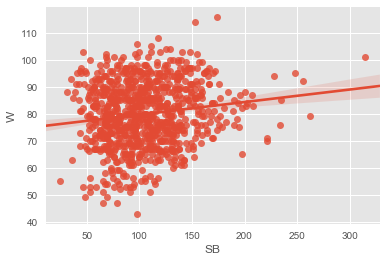

In [34]:
sns.regplot(analysis['SB'],analysis['W'])

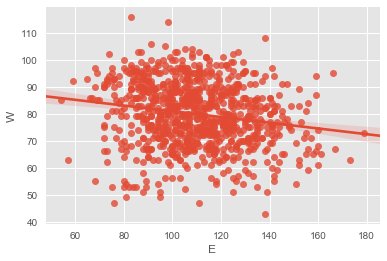

In [35]:
sns.regplot(analysis['E'],analysis['W'])

In [59]:
# create a list of features
feature_cols = ['WHIP', 'OPS', 'SB', 'SOA', 'E']

# create feature matrix (X)
X1 = analysis[feature_cols]
# create response vector (y)
y1 = analysis.W

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=1)

#train the model on the training data

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

#Train the model with cross-validation
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)

mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf.split(X1, y1):
    lr = LinearRegression().fit(X1.iloc[train_index], y1.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y1.iloc[test_index], lr.predict(X1.iloc[test_index])))
    scores.append(lr.score(X1, y1))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 46.3858519993
R2: 0.696765794246
Model 2
MSE: 41.5120736515
R2: 0.696969515302
Model 3
MSE: 39.8276702229
R2: 0.697247124183
Model 4
MSE: 45.0881844393
R2: 0.696932384682
Model 5
MSE: 44.4164893933
R2: 0.697431379317
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 43.4460539413
Mean of R2 for all folds: 0.697069239546


In [37]:
#the model explains 70% of the variability of the response data around its mean

## KNN Model Predicting Playoff Teams

In [38]:
analysis['DivWin']= team_stats['DivWin']
analysis['WCWin']= team_stats['WCWin']
analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 17 columns):
TeamYear      888 non-null object
W             888 non-null int64
HR            888 non-null int64
ERA           888 non-null float64
SO            888 non-null float64
SB            888 non-null float64
HRA           888 non-null int64
SOA           888 non-null int64
WHIP          888 non-null float64
E             888 non-null int64
OBP           888 non-null float64
SLG           888 non-null float64
OPS           888 non-null float64
Salary        888 non-null int64
attendance    888 non-null float64
DivWin        860 non-null object
WCWin         624 non-null object
dtypes: float64(8), int64(6), object(3)
memory usage: 164.9+ KB


In [39]:
analysis[['DivWin', 'WCWin']] = analysis[['DivWin', 'WCWin']].fillna(value='N')
analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 17 columns):
TeamYear      888 non-null object
W             888 non-null int64
HR            888 non-null int64
ERA           888 non-null float64
SO            888 non-null float64
SB            888 non-null float64
HRA           888 non-null int64
SOA           888 non-null int64
WHIP          888 non-null float64
E             888 non-null int64
OBP           888 non-null float64
SLG           888 non-null float64
OPS           888 non-null float64
Salary        888 non-null int64
attendance    888 non-null float64
DivWin        888 non-null object
WCWin         888 non-null object
dtypes: float64(8), int64(6), object(3)
memory usage: 164.9+ KB


In [40]:
analysis["DWCount"] = analysis.DivWin.map({'N':0, 'Y':1})
analysis["WCCount"] = analysis.WCWin.map({'N':0, 'Y':1})

In [41]:
analysis['playoffs'] = analysis['DWCount'] + analysis['WCCount']


In [42]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 20 columns):
TeamYear      888 non-null object
W             888 non-null int64
HR            888 non-null int64
ERA           888 non-null float64
SO            888 non-null float64
SB            888 non-null float64
HRA           888 non-null int64
SOA           888 non-null int64
WHIP          888 non-null float64
E             888 non-null int64
OBP           888 non-null float64
SLG           888 non-null float64
OPS           888 non-null float64
Salary        888 non-null int64
attendance    888 non-null float64
DivWin        888 non-null object
WCWin         888 non-null object
DWCount       888 non-null int64
WCCount       888 non-null int64
playoffs      888 non-null int64
dtypes: float64(8), int64(9), object(3)
memory usage: 185.7+ KB


In [43]:
analysis.tail(30)

,TeamYear,W,HR,ERA,SO,SB,HRA,SOA,WHIP,E,OBP,SLG,OPS,Salary,attendance,DivWin,WCWin,DWCount,WCCount,playoffs
858,KCA2015,95,139,3.73,973.0,104.0,155,1160,1.281680,88,0.321769,0.412197,0.733966,112107025,2708549.0,Y,N,1,0,1
859,MIN2015,83,156,4.07,1264.0,70.0,163,1046,1.329868,86,0.305328,0.399122,0.704450,107755000,2220054.0,N,N,0,0,0
860,CLE2015,81,141,3.67,1157.0,86.0,161,1407,1.185900,79,0.324534,0.400625,0.725159,87663766,1388905.0,N,N,0,0,0
861,CHA2015,76,136,3.98,1231.0,68.0,162,1359,1.319642,101,0.306342,0.380083,0.686425,112373700,1755810.0,N,N,0,0,0
862,DET2015,74,151,4.64,1259.0,83.0,193,1100,1.368348,86,0.327738,0.420161,0.747899,172284750,2726048.0,N,N,0,0,0
863,TOR2015,93,232,3.80,1151.0,88.0,173,1117,1.214434,88,0.339629,0.457070,0.796699,112992400,2794891.0,Y,N,1,0,1
864,NYA2015,87,212,4.03,1227.0,63.0,182,1370,1.296593,93,0.322860,0.420873,0.743733,212751957,3193795.0,N,Y,0,1,1
865,BAL2015,81,217,4.05,1331.0,44.0,174,1233,1.316682,77,0.307217,0.420602,0.727818,115044833,2281202.0,N,N,0,0,0
866,TBA2015,80,167,3.74,1310.0,87.0,175,1355,1.232339,95,0.314442,0.405834,0.720276,64521233,1287054.0,N,N,0,0,0
867,BOS2015,78,161,4.31,1148.0,71.0,178,1218,1.356041,97,0.325330,0.414539,0.739869,181103400,2880694.0,N,N,0,0,0


In [44]:
analysis.drop(['DivWin', 'WCWin', 'DWCount', 'WCCount'], axis=1, inplace=True)
analysis.tail()

,TeamYear,W,HR,ERA,SO,SB,HRA,SOA,WHIP,E,OBP,SLG,OPS,Salary,attendance,playoffs
883,LAN2015,92,187,3.44,1258.0,59.0,145,1396,1.184229,75,0.326101,0.412628,0.738729,215792000,3764815.0,1
884,SFN2015,84,136,3.72,1159.0,93.0,155,1165,1.228941,78,0.326130,0.406110,0.732239,164701500,3375882.0,0
885,ARI2015,79,154,4.04,1312.0,132.0,182,1215,1.329545,86,0.323808,0.414410,0.738218,61834000,2080145.0,0
886,SDN2015,74,148,4.09,1327.0,82.0,171,1393,1.310113,92,0.300084,0.384827,0.684911,118441300,2459742.0,0
887,COL2015,68,186,5.04,1283.0,97.0,183,1112,1.512970,95,0.315248,0.432340,0.747588,95688600,2506789.0,0


In [60]:
#Building a K Nearest Neighbor Classification Model to assess impact of these stats on whether a team will make the playoffs.
feature_cols = ['WHIP', 'OPS', 'SB', 'SOA', 'E']
X2 = analysis[feature_cols]

# create response vector (y)
y2 = analysis.playoffs

X.head()

,WHIP,OPS,SB,SOA,E
0,1.478380,0.677537,72.0,776,159
1,1.435179,0.765492,69.0,793,115
2,1.387406,0.775741,66.0,913,145
3,1.350034,0.716265,106.0,767,112
4,1.364576,0.704713,108.0,1023,111


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=99)

In [63]:
#train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [64]:
#test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.684684684685


In [65]:
#train the model on the training set (using K=2)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

#test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.707207207207


In [51]:
# examine the class distribution and compute null accuracy
y_test.value_counts()


0    166
1     56
Name: playoffs, dtype: int64

In [52]:
# examine the class distribution and compute null accuracy
y_test.value_counts().head(1) / len(y_test)

0    0.747748
Name: playoffs, dtype: float64

## Tuning the KNN Model

In [53]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=2)

# fit the model with data
knn.fit(X, y)

# store the predicted response values
y_pred_class = knn.predict(X)

In [54]:
# # calculate predicted probabilities of class membership
knn.predict_proba(X)

array([[ 1. ,  0. ],
       [ 0.5,  0.5],
       [ 1. ,  0. ],
       ..., 
       [ 0.5,  0.5],
       [ 1. ,  0. ],
       [ 1. ,  0. ]])

In [55]:
# viewing the accuracy of the training data
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

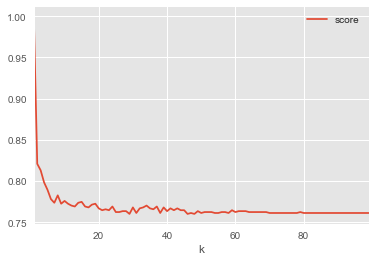

In [56]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');or'].idxmin()

In [67]:
from sklearn.metrics import accuracy_score

k_range = range(1, 101)
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [68]:
min(zip(testing_error, k_range))

(0.23873873873873874, 16)

In [69]:
#train the model on the training set (using K=16)
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

#test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.761261261261
